In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('theft.xlsx')
df.sample(5)

,Region,Sub Region,Country,Count,Rate,Year
1279,Europe,Southern Europe,Albania,7187,245.847917,2015
749,Europe,Eastern Europe,Republic of Moldova,13646,334.093854,2010
702,Americas,Central America,Nicaragua,10453,182.180283,2010
402,Asia,Western Asia,Georgia,18586,423.319709,2007
74,Africa,Northern Africa,Morocco,65299,216.370269,2004


In [4]:
df['Year'].unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016], dtype=int64)

In [7]:
dfg = df.groupby('Country').agg({'Count': 'sum', 'Rate':'mean', 'Year': 'last'})

In [11]:
dfg_sorted = dfg.sort_values(by=['Count', 'Year'], ascending=False)

In [12]:
dfg_sorted

,Count,Rate,Year
Country,,,
United States of America,88604714,2070.255291,2016
Germany,23524591,2063.732022,2016
United Kingdom (England and Wales),21816558,2824.315003,2016
Russian Federation,15203337,815.245719,2016
France,15137111,1716.158535,2016
...,...,...,...
St. Kitts and Nevis,1577,1022.307558,2011
Guinea,1348,13.350861,2007
Madagascar,646,0.463441,2015


In [19]:
dfg_sorted.reset_index(inplace=True)
dfg_sorted

,Country,Count,Rate,Year
0,United States of America,88604714,2070.255291,2016
1,Germany,23524591,2063.732022,2016
2,United Kingdom (England and Wales),21816558,2824.315003,2016
3,Russian Federation,15203337,815.245719,2016
4,France,15137111,1716.158535,2016
...,...,...,...,...
137,St. Kitts and Nevis,1577,1022.307558,2011
138,Guinea,1348,13.350861,2007
139,Madagascar,646,0.463441,2015
140,Sao Tome and Principe,43,4.087118,2011


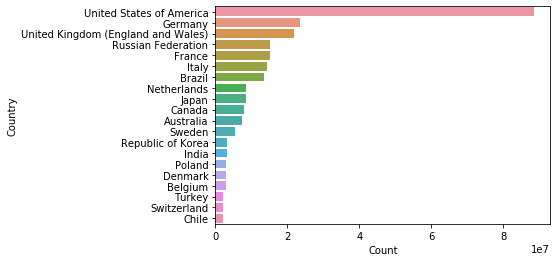

In [22]:
dfg_top20 = dfg_sorted.head(20)
sns.barplot(data=dfg_top20, x='Count', y='Country')
plt.savefig('plot.png', bbox_inches='tight')